In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [3]:
#load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded successfully')

model loaded successfully


In [ ]:
path = './test_images/N207.jpeg'
image = load_img(path)
image = np.array(image, dtype=np.uint8)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0

In [ ]:
 h,w,d = image.shape
print('height of the image is :' ,h)
print('Width of the image is:' , w)


height of the image is : 423
Width of the image is: 541


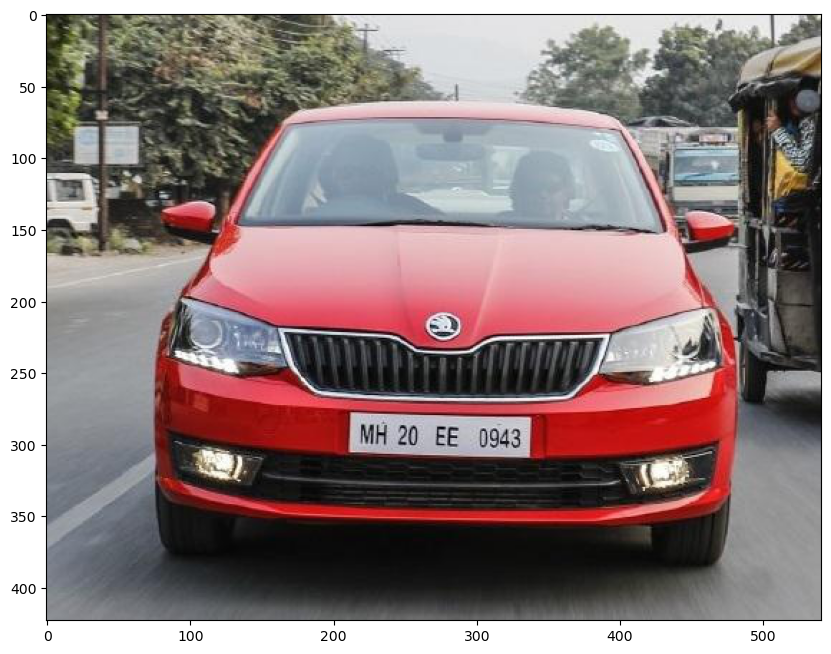

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show() 

In [ ]:
image_arr_224.shape

(224, 224, 3)

In [ ]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [ ]:
coords = model.predict(test_arr)
coords 

1/1 [==============================] - 0s 450ms/step


array([[0.06050551, 0.390551  , 0.3869598 , 0.408827  ]], dtype=float32)

In [ ]:
denorm = np.array([w,w,h,h])
coords=coords * denorm
coords

array([[ 32.73347856, 211.28809145, 163.68399167, 172.93382388]])

In [ ]:
coords = coords.astype(np.int32)
coords

array([[ 32, 211, 163, 172]])

(32, 163) (211, 172)


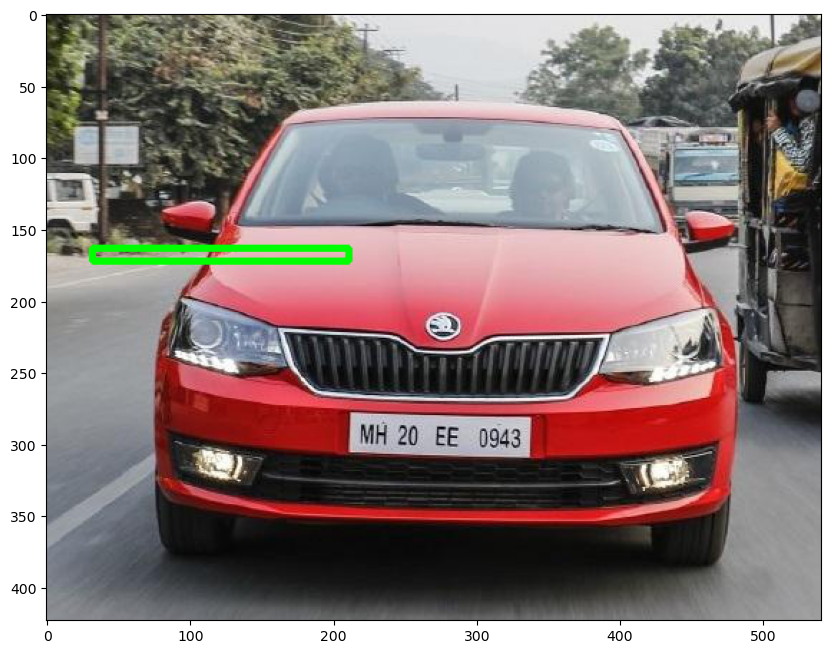

In [ ]:
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax , ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()